## Run_QLC_nonDim

This code solves the non-dimensionalized QLC problem. Parameters include:

- $\overline N$, and $N^*$ (atomistic-level characteristics of the ice QLL thicknesses)
- $\sigma_o$ (difference in equilibrium supersaturation between microsurfaces I and II)
- $h_{pr}$ (thickness of a prismatic facet monolayer)
- $D_{surf}$ (surface diffusion coefficient of the QLL)
- $\nu_{kin}$ (kinetic velocity -- the rate at which water vapor strikes the surface)
- $L$ (physical length of the facet surface)
- $nx_{crystal}$ (number of discrete points used to represent the surface)
- $L$ (crystal dimension)
- $\sigma_{I,corner}$ (imposed supersaturation at the facet corner)
- $c_r$ (relative reduction in supersaturation at facet centers relative to corners, in fraction and %)
- $t_{eq}$ (time constant for ice/QLL freezing/thawing)

In [1]:
from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pylab as plt
import QLC_nonDim as QLC_nonDim
import f90nml

In [2]:
%matplotlib widget

In [3]:
# This is for plotting a single function with matplotlib.pyplot
def plot_alone(ylist, xlist, label = ""):
    plt.figure()
    plt.plot(xlist,ylist,label=label)
    plt.xlabel('x (micrometers)')
    plt.grid(True)
    plt.legend()

In [4]:
# Specify the input file
inputfile = "GI parameters - Reference limit cycle.nml"

# Solve the PDE
val1 = QLC_nonDim.generate_reference_solution(inputfile = inputfile, runtime=50)

Using parameter file GI parameters - Reference limit cycle.nml ...

This is a run from time 0.0 millisecond to 50.0 millisecond
dt = 1020.4081632653061 microsecond
10 % elapsed time is 0.006 minutes
20 % elapsed time is 0.011 minutes
30 % elapsed time is 0.017 minutes
40 % elapsed time is 0.022 minutes
50 % elapsed time is 0.028 minutes
60 % elapsed time is 0.033 minutes
70 % elapsed time is 0.039 minutes
80 % elapsed time is 0.044 minutes
90 % elapsed time is 0.050 minutes
100% done
status =  0
message =  The solver successfully reached the end of the integration interval.
['message', 'nfev', 'njev', 'nlu', 'sol', 'status', 'success', 't', 't_events', 'y', 'y_events']


50 320


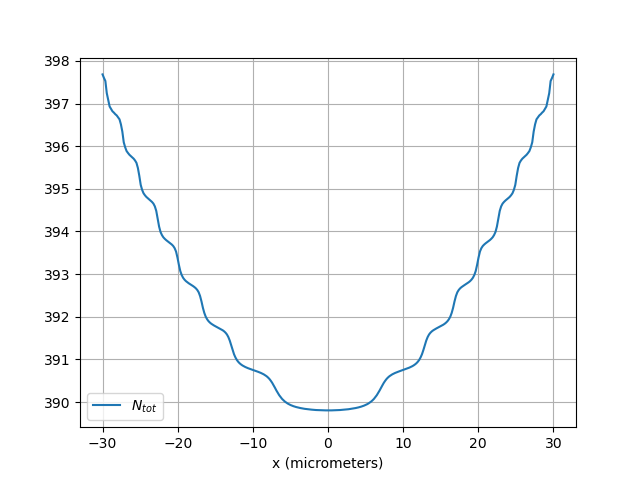

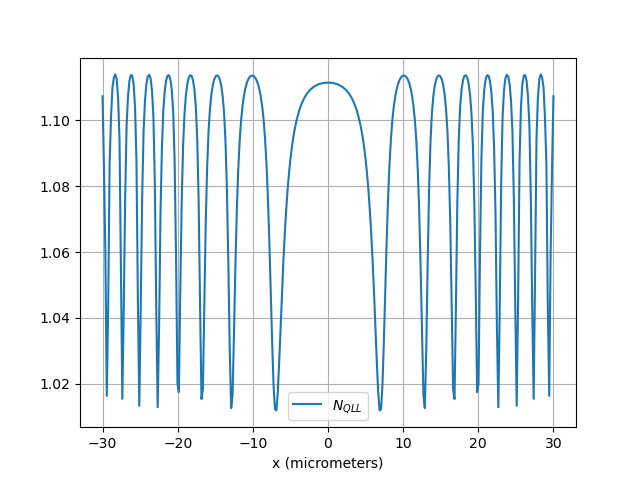

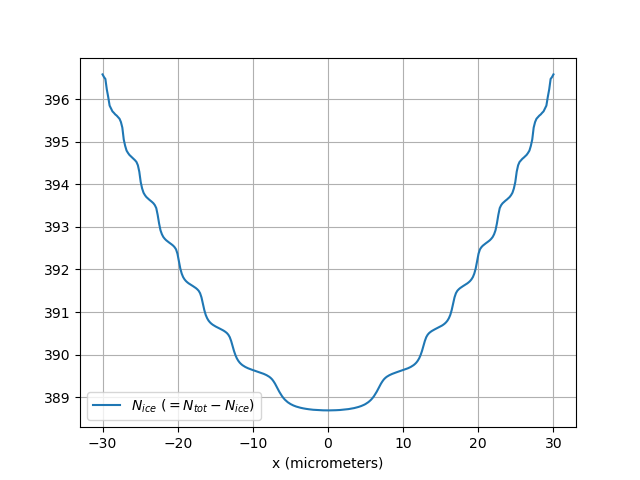

In [6]:
# Dimensionalized spatial information we want for plotting
GI=f90nml.read(inputfile)['GI']
L = GI['L']
ntimes, nx_crystal = np.shape(val1[0]); print(ntimes,nx_crystal)
x_QLC = np.linspace(-L,L,nx_crystal)

# Plotting the solution
itime = -1 # This specifies which time index we want (-1 => last one)
plot_alone(val1[0][itime], x_QLC, "$N_{tot}$")
plot_alone(val1[1][itime], x_QLC, "$N_{QLL}$")
plot_alone(val1[2][itime], x_QLC, "$N_{ice}$ ($ = N_{tot}-N_{ice}$)")